Need to check list of words for repeats, need unique list
Check importance of double letters (is prioritizing more characters more valuable than repeats of higher "value" letters)
Increase char prop values by 1000 to make values more readable

In [19]:
# load packages

import pandas as pd
import numpy as np
np.random.seed(59)
import seaborn as sns
import math
import string

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

import urllib.request

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [20]:
# read in list of words to be used as database of answers

url = "https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt"
file = urllib.request.urlopen(url)
db = []

for line in file:
    decoded_line = line.decode("utf-8")
    db.append(decoded_line)
    
db

['which\n',
 'there\n',
 'their\n',
 'about\n',
 'would\n',
 'these\n',
 'other\n',
 'words\n',
 'could\n',
 'write\n',
 'first\n',
 'water\n',
 'after\n',
 'where\n',
 'right\n',
 'think\n',
 'three\n',
 'years\n',
 'place\n',
 'sound\n',
 'great\n',
 'again\n',
 'still\n',
 'every\n',
 'small\n',
 'found\n',
 'those\n',
 'never\n',
 'under\n',
 'might\n',
 'while\n',
 'house\n',
 'world\n',
 'below\n',
 'asked\n',
 'going\n',
 'large\n',
 'until\n',
 'along\n',
 'shall\n',
 'being\n',
 'often\n',
 'earth\n',
 'began\n',
 'since\n',
 'study\n',
 'night\n',
 'light\n',
 'above\n',
 'paper\n',
 'parts\n',
 'young\n',
 'story\n',
 'point\n',
 'times\n',
 'heard\n',
 'whole\n',
 'white\n',
 'given\n',
 'means\n',
 'music\n',
 'miles\n',
 'thing\n',
 'today\n',
 'later\n',
 'using\n',
 'money\n',
 'lines\n',
 'order\n',
 'group\n',
 'among\n',
 'learn\n',
 'known\n',
 'space\n',
 'table\n',
 'early\n',
 'trees\n',
 'short\n',
 'hands\n',
 'state\n',
 'black\n',
 'shown\n',
 'stood\n',
 'fr

In [21]:
# cleaning up list, converting to upper case to match wordle

db_temp = []

for x in db:
    cut_string = x[:5]
    db_temp.append(cut_string.upper())
    
db_temp 
db = db_temp.copy()
db_temp.clear()

db

['WHICH',
 'THERE',
 'THEIR',
 'ABOUT',
 'WOULD',
 'THESE',
 'OTHER',
 'WORDS',
 'COULD',
 'WRITE',
 'FIRST',
 'WATER',
 'AFTER',
 'WHERE',
 'RIGHT',
 'THINK',
 'THREE',
 'YEARS',
 'PLACE',
 'SOUND',
 'GREAT',
 'AGAIN',
 'STILL',
 'EVERY',
 'SMALL',
 'FOUND',
 'THOSE',
 'NEVER',
 'UNDER',
 'MIGHT',
 'WHILE',
 'HOUSE',
 'WORLD',
 'BELOW',
 'ASKED',
 'GOING',
 'LARGE',
 'UNTIL',
 'ALONG',
 'SHALL',
 'BEING',
 'OFTEN',
 'EARTH',
 'BEGAN',
 'SINCE',
 'STUDY',
 'NIGHT',
 'LIGHT',
 'ABOVE',
 'PAPER',
 'PARTS',
 'YOUNG',
 'STORY',
 'POINT',
 'TIMES',
 'HEARD',
 'WHOLE',
 'WHITE',
 'GIVEN',
 'MEANS',
 'MUSIC',
 'MILES',
 'THING',
 'TODAY',
 'LATER',
 'USING',
 'MONEY',
 'LINES',
 'ORDER',
 'GROUP',
 'AMONG',
 'LEARN',
 'KNOWN',
 'SPACE',
 'TABLE',
 'EARLY',
 'TREES',
 'SHORT',
 'HANDS',
 'STATE',
 'BLACK',
 'SHOWN',
 'STOOD',
 'FRONT',
 'VOICE',
 'KINDS',
 'MAKES',
 'COMES',
 'CLOSE',
 'POWER',
 'LIVED',
 'VOWEL',
 'TAKEN',
 'BUILT',
 'HEART',
 'READY',
 'QUITE',
 'CLASS',
 'BRING',
 'ROUND',


In [22]:
# checking length of list

len(db)

5757

In [23]:
# function for splitting words

def split(word):
    return [char for char in word]

In [24]:
# function for determing distribution of letters, based upon original data set. Also determined letter weighting

char_count = {}
char_totals = {}
char_st = {}
char_temp = []

def char_totals_func(word_list):

    char_count.clear()
    
    for word in word_list:
        char_temp = split(word)

        for char in char_temp:
            if (char in char_count):
                char_count[char] += 1
            else:
                char_count[char] = 1
                
    char_totals.clear()
    
    sorted_chars = dict(sorted(char_count.items(), key = lambda x: x[0].lower()))
    
    for k,v in sorted_chars.items():
        char_totals[k] = v
    
    print(char_totals)

    # confirming values match total words times 5 letters
    print('Expected Number = ' + str(len(word_list)*5))
    print('Sum of letter count = ' + str(sum(char_totals.values())))

    plt.bar(list(char_totals.keys()), char_totals.values(), color = 'b')
    plt.show()
    
    char_st.clear()

    for k,v in char_totals.items():
        char_st[k] = v/sum(char_totals.values())

    char_max = (max(char_st.values()))

    for k,v in char_st.items():
        char_st[k] = (v/char_max)*1

{'A': 2348, 'B': 715, 'C': 964, 'D': 1181, 'E': 3009, 'F': 561, 'G': 679, 'H': 814, 'I': 1592, 'J': 89, 'K': 596, 'L': 1586, 'M': 843, 'N': 1285, 'O': 1915, 'P': 955, 'Q': 53, 'R': 1910, 'S': 3033, 'T': 1585, 'U': 1089, 'V': 318, 'W': 505, 'X': 139, 'Y': 886, 'Z': 135}
Expected Number = 28785
Sum of letter count = 28785


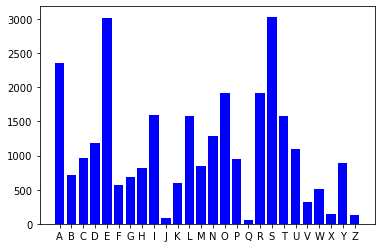

In [25]:
# running counter on original database           
char_totals_func(db)

In [26]:
# function for sorting data set to only words in five unique values

db_uniques = []

def db_uniques_func(word_list):

    db_uniques.clear()
    
    for word in word_list:
        char_temp = split(word)

        if (len(set(char_temp)) == len(word)): db_uniques.append(word)

    print('Filtered list length: ' + str(len(db_uniques)))
    print(str(len(word_list)-len(db_uniques)) + ' words have been removed')

In [27]:
# sorting for uniques on original data set
db_uniques_func(db)

Filtered list length: 3834
1923 words have been removed


In [28]:
# function for weighting words in list. Gives highest strength word in list
# db stores words

word_st = {}
char_st_temp = {}

def word_st_func(word_list):
    
    word_st.clear()
    
    for word in word_list:
        char_temp = split(word)

        char_st_temp = {}
        word_st_temp = 1


        for char in char_temp:
            if (char in char_st_temp):
                char_st_temp[char] = char_st_temp[char] * char_st[char]

            else:
                char_st_temp[char] = char_st[char]

        for char in char_st_temp:
            word_st_temp = word_st_temp * char_st_temp[char]


        word_st[word] = word_st_temp

In [29]:
# weighting each word in the filtered, unique data set

word_st_func(db_uniques)
print("Highest strength words: " + str(sorted(word_st, key=word_st.get, reverse=True)[:5]))

Highest strength words: ['AROSE', 'RAISE', 'ARISE', 'ALOES', 'STOAE']


In [30]:
# filtering based upon responses

word_played_r1 = 'AROSE'

In [31]:
# key: 0 = gray, 1 = yellow, 2 = green

word_played_r1_result = [0,2,0,0,0]

#creating list of possible letters for each slot based upon database

#creating dictionary that reflects all possible characters for each slot
#char_loc_ref = dicionary containing all possible letters for each slot
#key = char_temp.index(char)
#value = char

for word in db:
    char_temp = []
    
    char_temp = split(word)
    
    for char in char_temp:
        if char_temp.index(char) not in char_loc_ref:
            char_loc_ref[char_temp.index(char)] = char 
        elif isinstance (char_loc_ref[char_temp.index(char)], list):
            if char not in char_loc_ref[char_temp.index(char)]:
                char_loc_ref[char_temp.index(char)].append(char)
        else:
            char_loc_ref[char_temp.index(char)] = [char_loc_ref[char_temp.index(char)], char]
            
for slot in char_loc_ref:
    char_loc_ref[slot] = sorted(char_loc_ref[slot])
    
char_loc_ref

In [32]:
# creating list of all possible letters per slot

char_loc_ref = {}

for i in range(5):

    char_loc_ref[i] = "A"
    char_loc_ref[i] = [char_loc_ref[i], "B"]

    for char in string.ascii_uppercase[2:]:
        char_loc_ref[i].append(char)


In [33]:
# function for filtering possible characters for each slot based upon result
   
char_include = []
    
def char_loc_ref_filt_func(word_played_rX, word_played_rX_result):
    
    char_temp = split(word_played_rX)

    for i in range(len(word_played_rX_result)):
        if word_played_rX_result[i] == 0:
            for slot in char_loc_ref:
                if char_temp[i] in char_loc_ref[slot] and len(char_loc_ref[slot]) != 1: char_loc_ref[slot].remove(char_temp[i])

        if word_played_rX_result[i] == 1:
            # Kept to account for answer not being in data set, leading to error
            if char_temp[i] in char_loc_ref[i]: char_loc_ref[i].remove(char_temp[i])

            if char_temp[i] not in char_include: char_include.append(char_temp[i])

        if word_played_rX_result[i] == 2:
                char_loc_ref[i].clear()
                char_loc_ref[i].append(char_temp[i])

    print(char_loc_ref)

In [34]:
# running filtering character reference list based on first round
char_loc_ref_filt_func(word_played_r1, word_played_r1_result)

{0: ['B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 1: ['R'], 2: ['B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 3: ['B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 4: ['B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']}


In [35]:
# function for filtering data set based upon possible character values

def db_filtered_func(db_to_filt):
    
    db_filtered_temp = db_to_filt.copy()

    for word in db_to_filt:
        char_temp = split(word)

        for i in range(len(char_temp)):
            if char_temp[i] not in char_loc_ref[i]:
                db_filtered_temp.remove(word)            
                break   

    db_filtered_temp_output = db_filtered_temp.copy()
    
    for word in db_filtered_temp_output:
        char_temp = split(word)

        for char in char_include:
            if char not in char_temp:
                db_filtered_temp.remove(word)
                break

    global db_filtered
    db_filtered = db_filtered_temp.copy()

    print(db_filtered)
    print("Number of Possible Answers: " + str(len(db_filtered)))

In [36]:
# filtered data set based upon resulted of first round
db_filtered_func(db)

['BRING', 'FRUIT', 'DRINK', 'TRUCK', 'TRUTH', 'TRICK', 'TRULY', 'TRUNK', 'DRILL', 'PRINT', 'BRICK', 'DRIFT', 'DRUNK', 'GRIND', 'GRILL', 'BRINK', 'DRYLY', 'GRUFF', 'GRUNT', 'WRUNG', 'WRING', 'CRUMB', 'WRYLY', 'TRILL', 'GRIMY', 'BRUNT', 'FRILL', 'GRUMP', 'PRICK', 'KRILL', 'BRINY', 'PRIVY', 'BRUNG', 'CRIMP', 'CRICK', 'FRIZZ', 'TRUMP', 'CRYPT', 'PRINK', 'FRUMP', 'BRUIN', 'DRUID', 'DRILY', 'PRIMP', 'GRIFT', 'BRUIT', 'CRUFT', 'CRUMP', 'CRINK']
Number of Possible Answers: 49


{'B': 9, 'C': 12, 'D': 9, 'F': 9, 'G': 11, 'H': 1, 'I': 30, 'K': 12, 'L': 14, 'M': 8, 'N': 16, 'P': 12, 'R': 49, 'T': 17, 'U': 20, 'V': 1, 'W': 3, 'Y': 10, 'Z': 2}
Expected Number = 245
Sum of letter count = 245


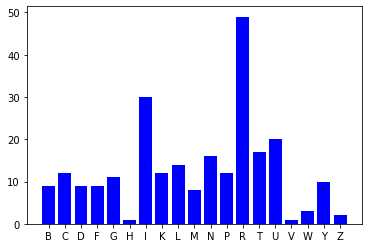

Filtered list length: 36
13 words have been removed
Highest strength words: ['PRINT', 'FRUIT', 'BRUIT', 'BRUIN', 'TRICK']


In [37]:
# determing distribution of letters, based upon filtered data set, determining new letter weighting
# filtering for words with five unique letters on filtered data set
# weighting words in new filtered list. Must include "yellow" letters

char_totals_func(db_filtered)
db_uniques_func(db_filtered)
word_st_func(db_uniques)
print("Highest strength words: " + str(sorted(word_st, key=word_st.get, reverse=True)[:5]))

In [38]:
# word played for round 2

word_played_r2 = 'PRINT'

In [39]:
# key: 0 = gray, 1 = yellow, 2 = green

word_played_r2_result = [0,2,0,2,0]

In [40]:
# running filtering character reference list based on second round
char_loc_ref_filt_func(word_played_r2, word_played_r2_result)

{0: ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y', 'Z'], 1: ['R'], 2: ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y', 'Z'], 3: ['N'], 4: ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y', 'Z']}


In [41]:
# filtered data set based upon results of second round
db_filtered_func(db_filtered)

['DRUNK', 'WRUNG', 'BRUNG']
Number of Possible Answers: 3


{'B': 1, 'D': 1, 'G': 2, 'K': 1, 'N': 3, 'R': 3, 'U': 3, 'W': 1}
Expected Number = 15
Sum of letter count = 15


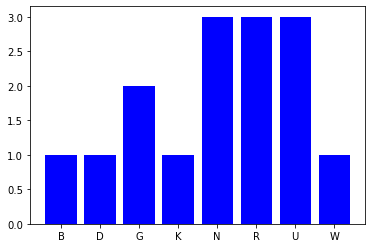

Filtered list length: 3
0 words have been removed
Highest strength words: ['WRUNG', 'BRUNG', 'DRUNK']


In [42]:
# determing distribution of letters, based upon filtered data set, determining new letter weighting
# filtering for words with five unique letters on filtered data set
# weighting words in new filtered list. Must include "yellow" letters

char_totals_func(db_filtered)
db_uniques_func(db_filtered)
word_st_func(db_uniques)
print("Highest strength words: " + str(sorted(word_st, key=word_st.get, reverse=True)[:5]))

In [43]:
# word played for round 3

word_played_r3 = 'DRUNK'

In [44]:
# key: 0 = gray, 1 = yellow, 2 = green

word_played_r3_result = [0,2,2,2,0]

In [45]:
# running filtering character reference list based on second round
char_loc_ref_filt_func(word_played_r3, word_played_r3_result)

{0: ['B', 'C', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y', 'Z'], 1: ['R'], 2: ['U'], 3: ['N'], 4: ['B', 'C', 'F', 'G', 'H', 'J', 'L', 'M', 'N', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y', 'Z']}


In [46]:
# filtered data set based upon results of third round
db_filtered_func(db_filtered)

['WRUNG', 'BRUNG']
Number of Possible Answers: 2


{'B': 1, 'G': 2, 'N': 2, 'R': 2, 'U': 2, 'W': 1}
Expected Number = 10
Sum of letter count = 10


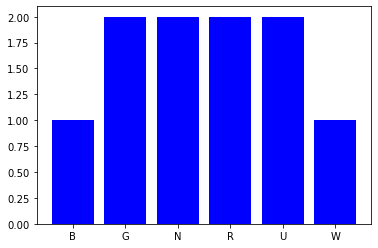

Highest strength words: ['WRUNG', 'BRUNG']


In [47]:
# determing distribution of letters, based upon filtered data set, determining new letter weighting
# words with multiple letters allowed for fourth round and on
# weighting words in new filtered list. Must include "yellow" letters

char_totals_func(db_filtered)
word_st_func(db_filtered)
print("Highest strength words: " + str(sorted(word_st, key=word_st.get, reverse=True)[:5]))

Words with multiple usage of same letter allowed for fourth round and on

In [48]:
# weighting words in new filtered list. Must include "yellow" letters

word_st_func(db_filtered)
print("Highest strength words: " + str(sorted(word_st, key=word_st.get, reverse=True)[:5]))

Highest strength words: ['WRUNG', 'BRUNG']


In [49]:
# word played for round 4

word_played_r4 = 'BRUNG'

In [50]:
# key: 0 = gray, 1 = yellow, 2 = green

word_played_r4_result = [2,2,2,2,2]

In [51]:
# running filtering character reference list based on fourth round
char_loc_ref_filt_func(word_played_r4, word_played_r4_result)

{0: ['B'], 1: ['R'], 2: ['U'], 3: ['N'], 4: ['G']}


In [52]:
# filtered data set based upon results of third round
db_filtered_func(db_filtered)

['BRUNG']
Number of Possible Answers: 1
